<a href="https://colab.research.google.com/github/dWanderingSoul/CV/blob/main/house-prices-advanced-regression-techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
from google.colab import files


uploaded = files.upload()

Saving train.csv to train.csv


In [12]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [13]:
# Selecting relevant features and the target variable
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]  # Features
y = df['SalePrice']  # Target


In [14]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2806426667.247853
R-squared: 0.6341189942328371


In [17]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 52975.71771338122


In [18]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


               Coefficient
GrLivArea       104.026307
BedroomAbvGr -26655.165357
FullBath      30014.324109


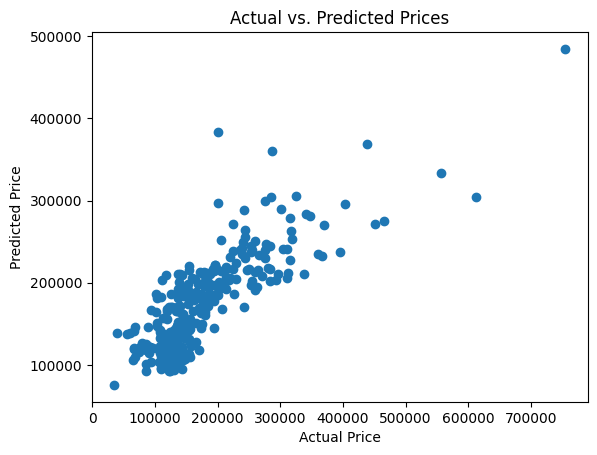

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()